# Apply $\pi^+/\pi^-$ acceptance matching cut in $p-\theta$ plane 

last edit Apr-14, 2022

## Imports and definitions

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

## Auxiliary functions

# load data 

In [4]:
load_SIDIS_data( Nruns = 1)

Run number  6420 (1/1 runs)
Loaded 644481 (e,e piplus ) events and  48 (e,e piplus n), events
retained 25 (e,e piplus n), events with Pn > 275 MeV/c
Loaded 274142 (e,e piminus ) events and  7 (e,e piminus n), events
retained 7 (e,e piminus n), events with Pn > 275 MeV/c
Done loading files.


In [5]:
apply_further_selection_cuts_to_data(fdebug=2)

(e,e piplus )
644481 events before cut
442203 events after p-theta cut (68.6 %)
398666 events after M_X cut (61.9 %)
(e,e piminus )
274142 events before cut
265675 events after p-theta cut (96.9 %)
245408 events after M_X cut (89.5 %)


# Implement and check acceptance-matching cut

## Plot $p$ vs. $\theta$ for different sectors

In [6]:
bins = (np.linspace(1,5,100),np.linspace(0,40,100))
xticks = np.linspace(1,5,5)
yticks = np.linspace(0,40,5)

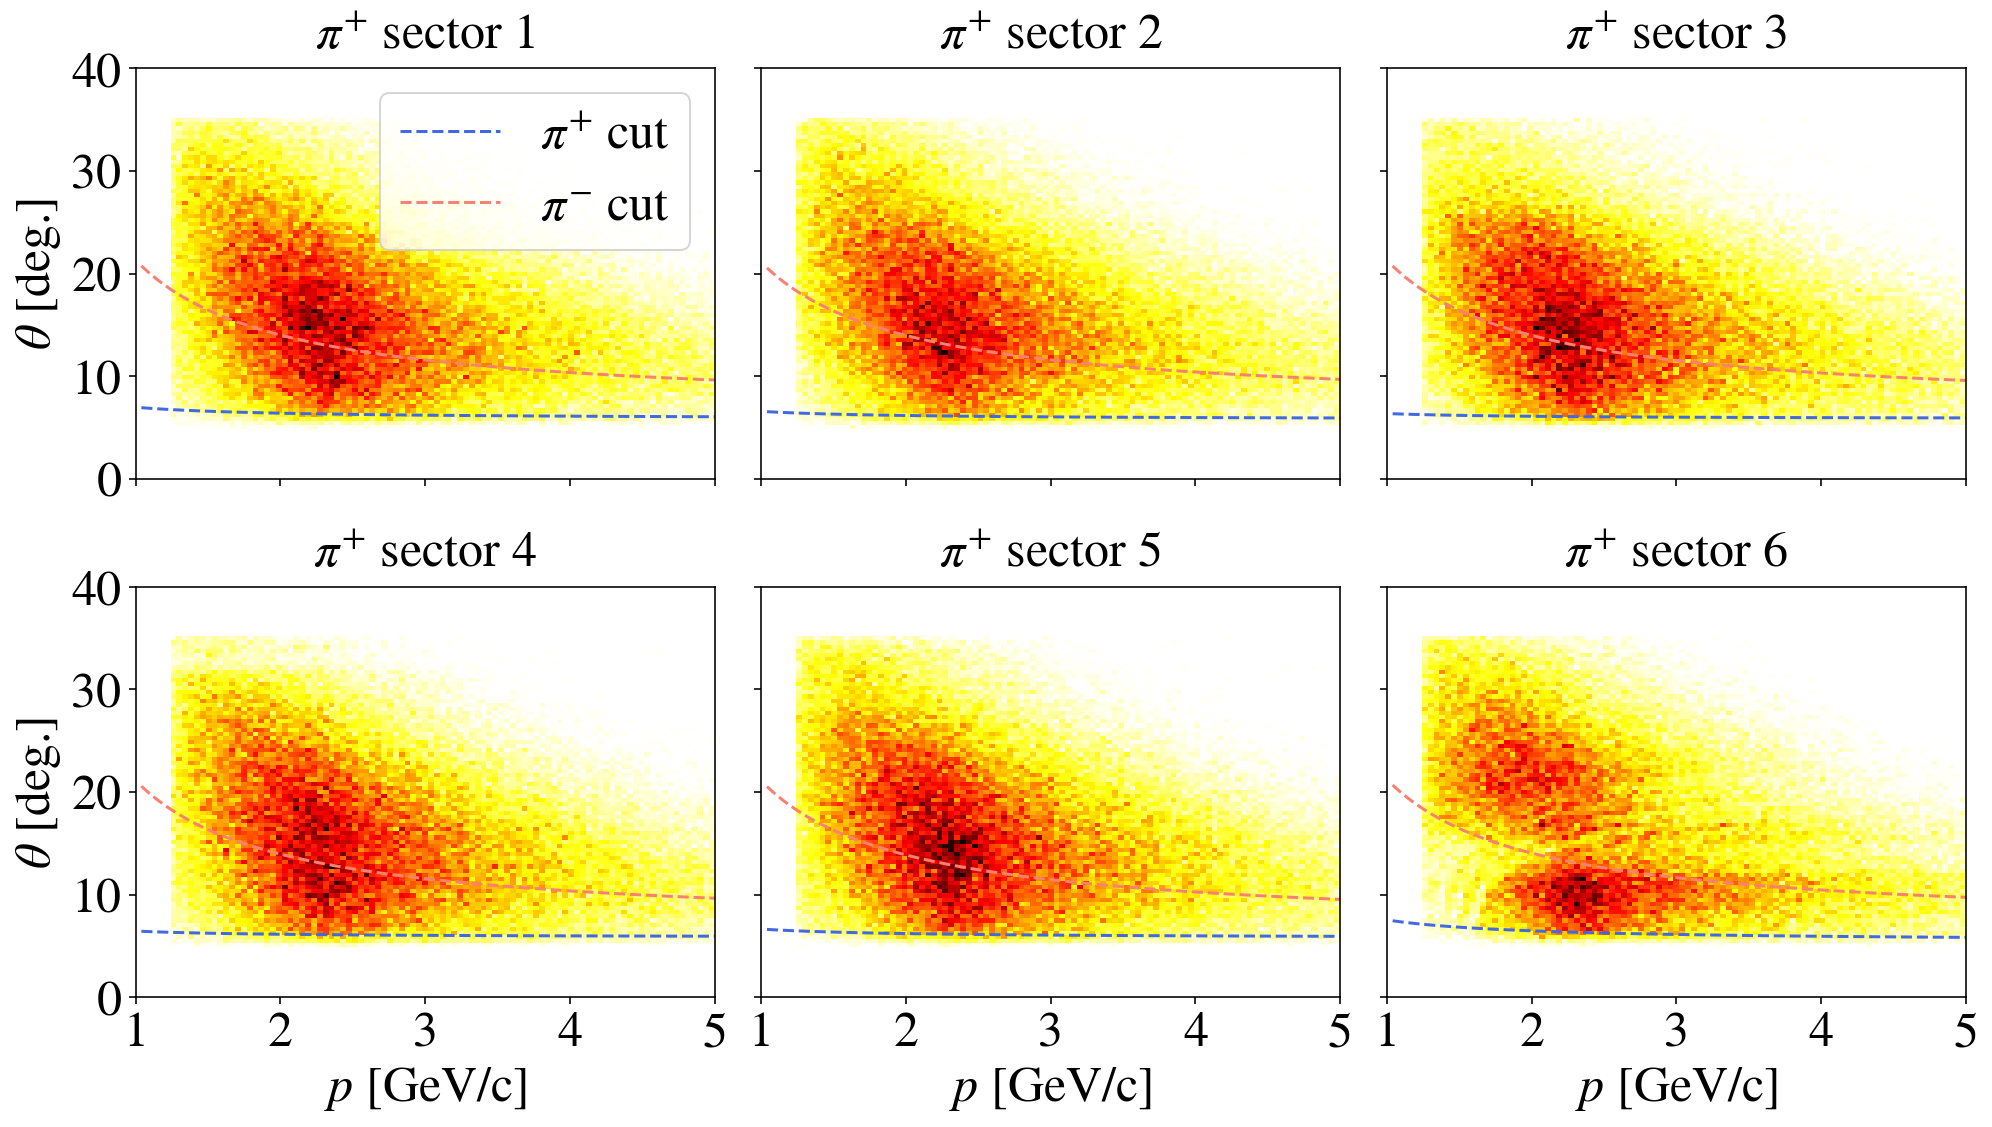

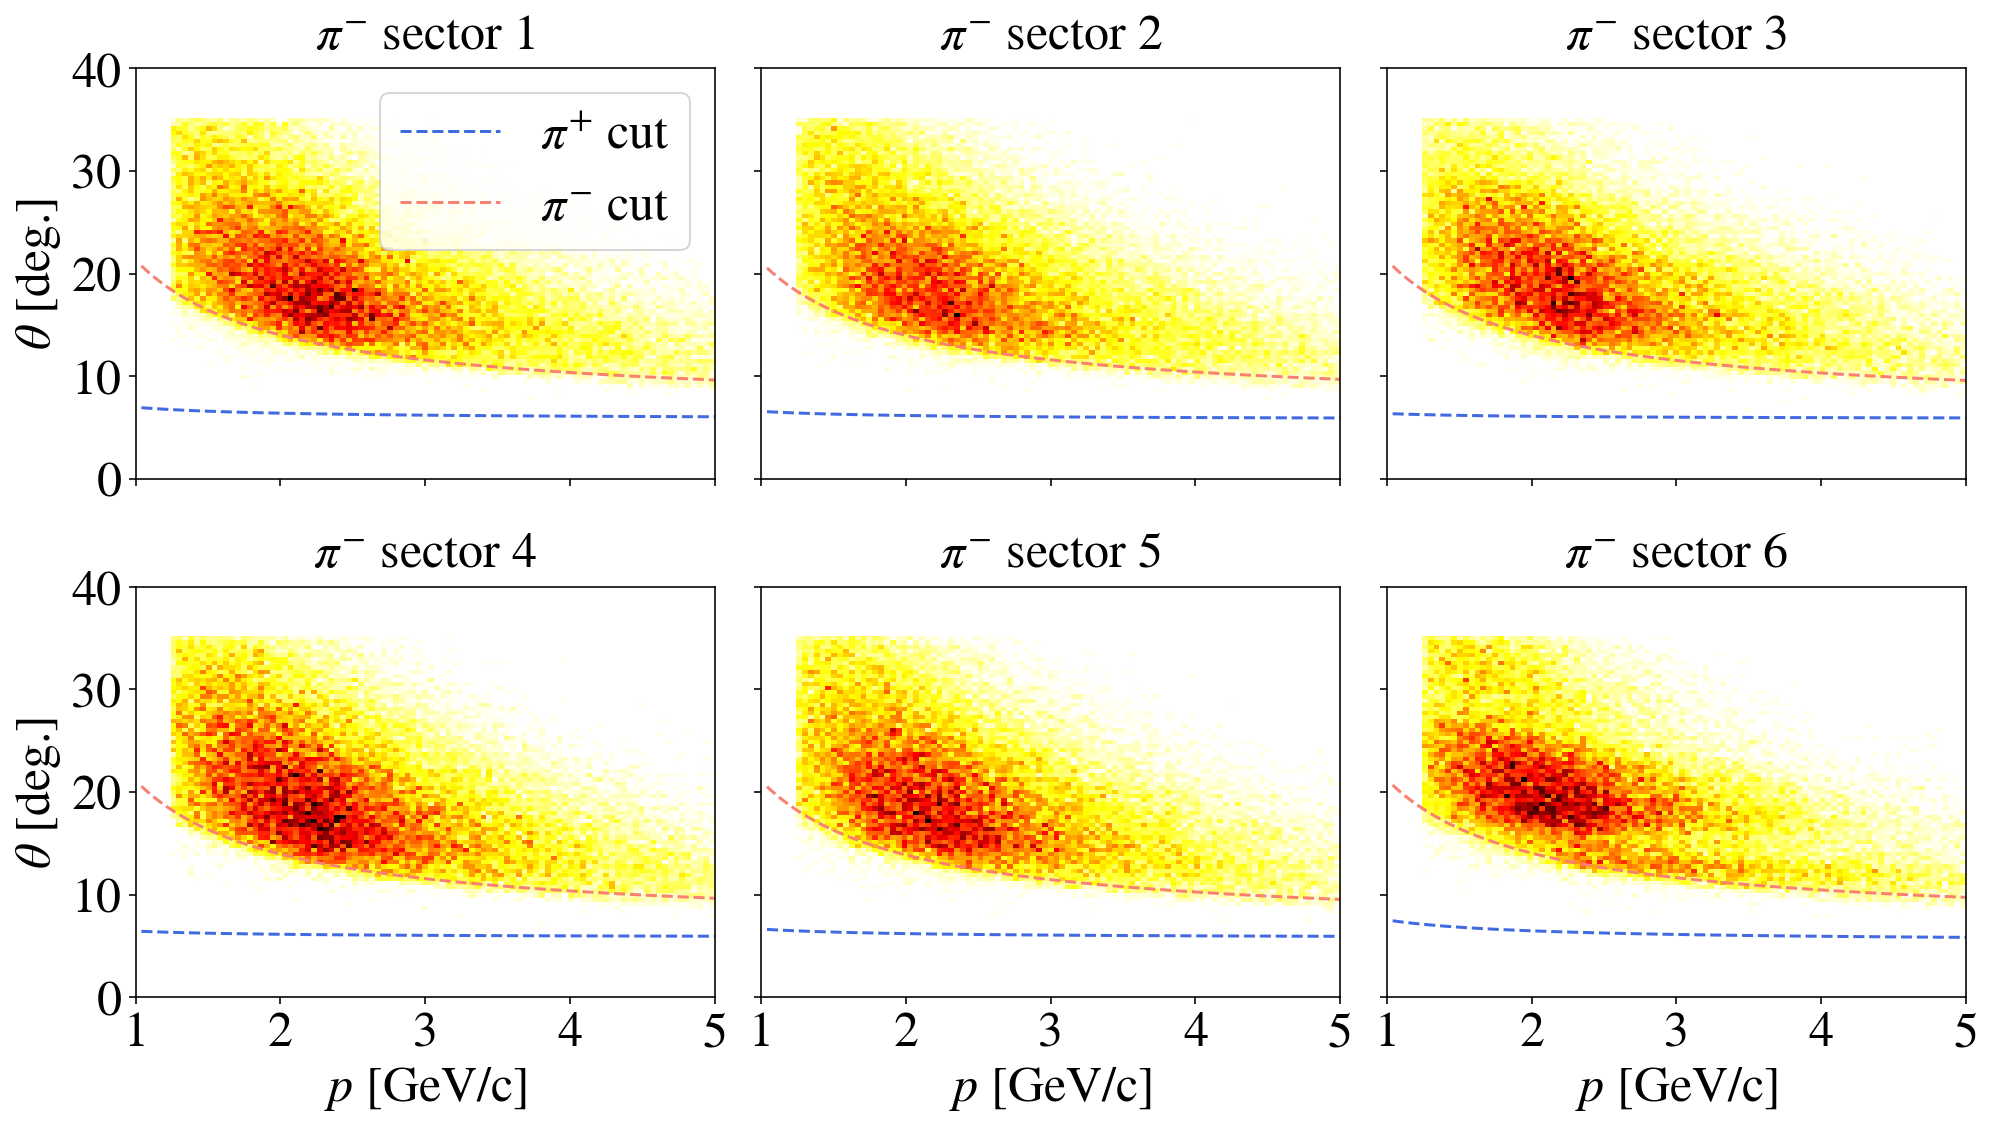

In [7]:
for pi_charge_name,pi_label,pi_color in zip(pi_charge_names,pi_labels,pi_colors):#{
    df = e_e_pi[pi_charge_name]



    fig = plt.figure(figsize=(14,8))
    for sector in range(1,7):
        ax = fig.add_subplot(2,3,sector)
        df_sector = df[df.pi_DC_sector == sector]

        plt.hist2d( df_sector.pi_P, df_sector.pi_Theta*r2d, cmap='hot_r',bins=bins, label='data');

        p = bins[0][1:]
        for pi_cut_charge_name,pi_cut_label,pi_cut_color in zip(pi_charge_names,pi_labels,pi_colors):
            min_theta = pi_min_theta_cut( pi_cut_charge_name, sector, p )
            plt.plot(p, min_theta, '--', label='$'+pi_cut_label+'$ cut', color=pi_cut_color)

        set_axes(ax,'$p$ [GeV/c]' if sector>3 else '',
                 '$\\theta$ [deg.]' if sector%3==1 else '',
                 remove_ticks_x = False if sector>3 else True,
                 remove_ticks_y = False if sector%3==1 else True,
                 title='$'+pi_label+'$ sector %d'%sector,xticks=xticks, yticks=yticks, 
                 do_add_legend=True if sector==1 else False)
    plt.tight_layout()                   

#}

## Apply $p$ vs. $\theta$ for different sectors

In [8]:
e_e_pi_after_cut = apply_p_theta_acceptance_cut(df_dict=e_e_pi)
print('done applying p-theta cut')
#e_e_pi

done applying p-theta cut


## Plot $\phi$ distribution for the events that passed the cut

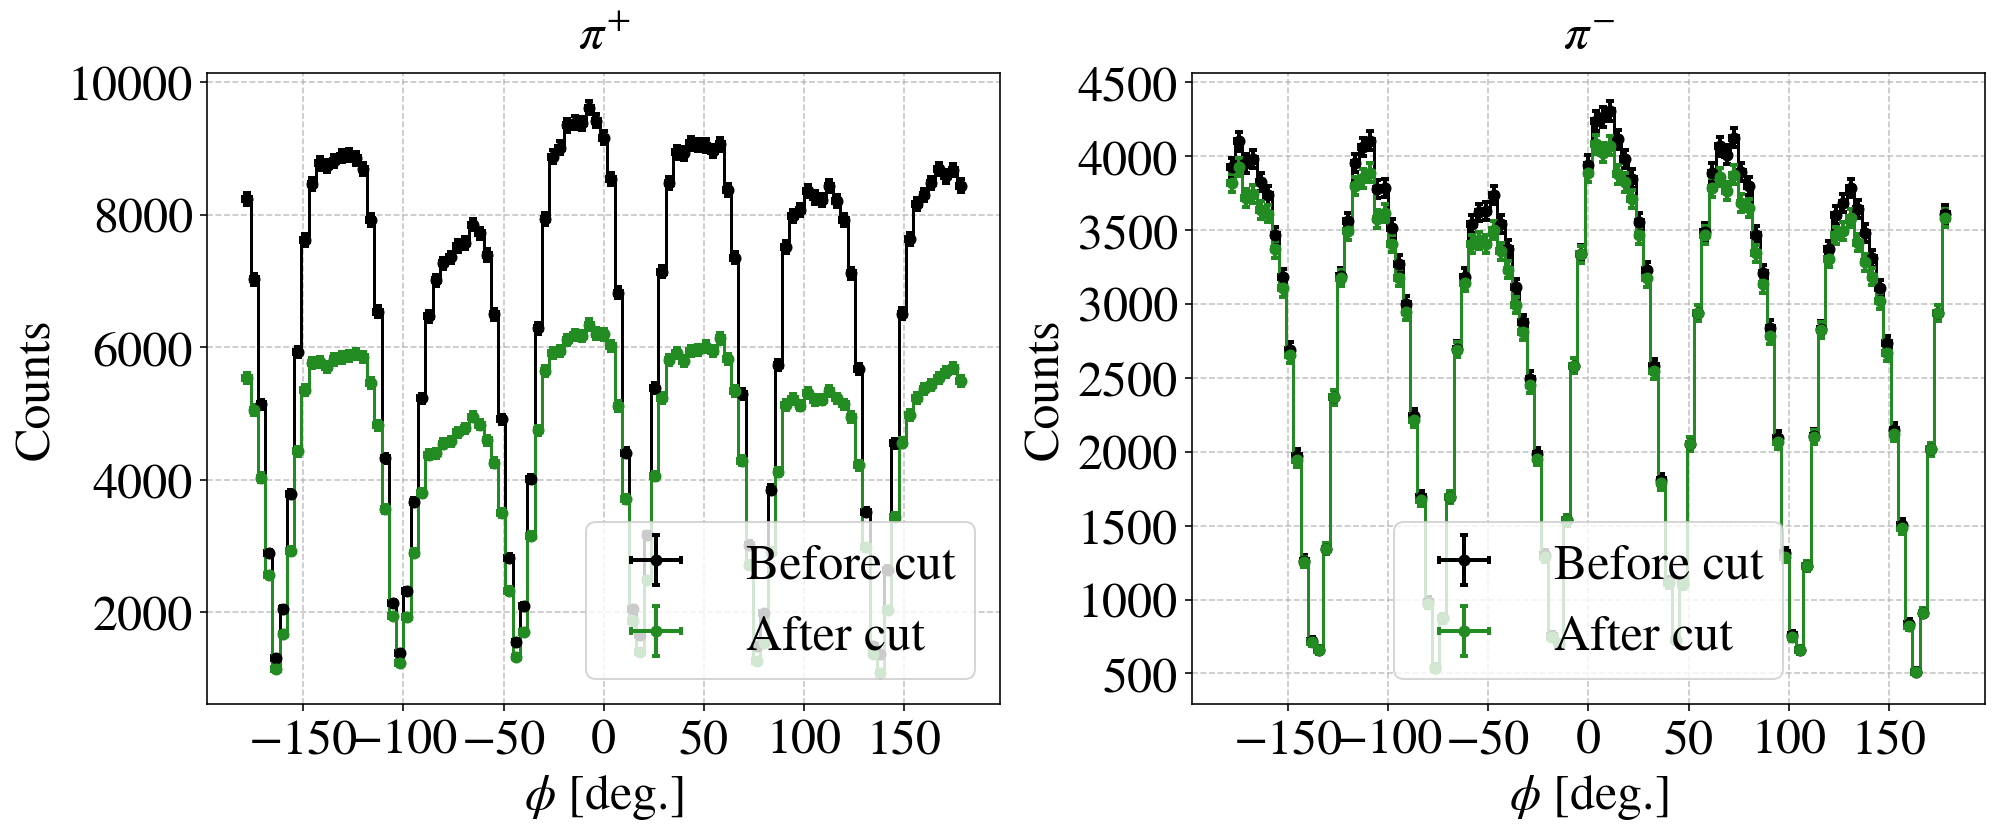

In [9]:
bins=np.linspace(-180,180,100)

fig = plt.figure(figsize=(14,6));

for pi_charge_name,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    ax = fig.add_subplot(1,2,pi_idx)
    
    plot_step_hist( x_arr=np.array(e_e_pi[pi_charge_name].pi_Phi)*r2d, 
                   bins=bins , label='Before cut', color='black' )

    plot_step_hist( x_arr=np.array(e_e_pi_after_cut[pi_charge_name].pi_Phi)*r2d, 
                   bins=bins , label='After cut', color='forestgreen' )

    set_axes(ax, '$\phi$ [deg.]', 'Counts', title='$'+pi_label+'$', do_add_grid=True,do_add_legend=True)
    
plt.tight_layout()

### Check that cut works

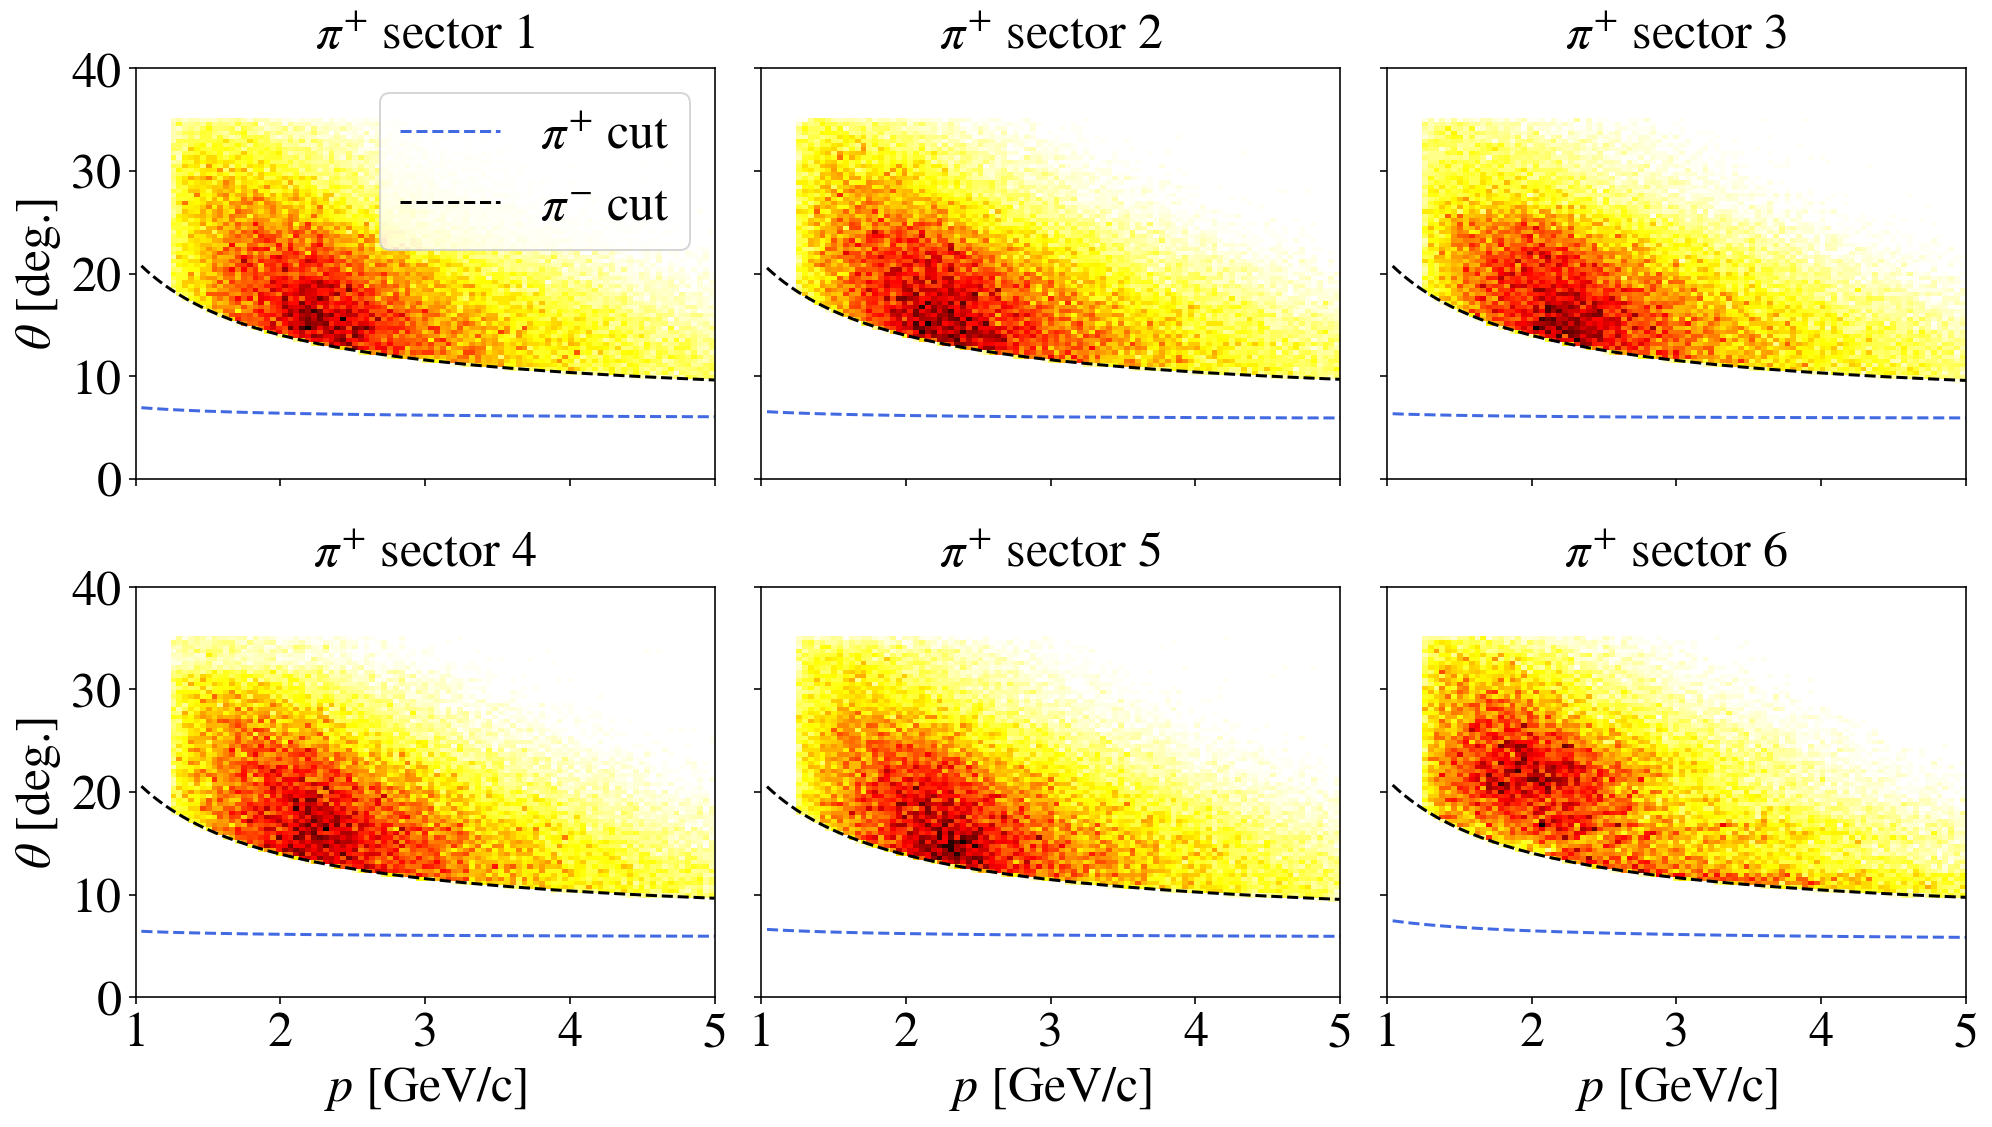

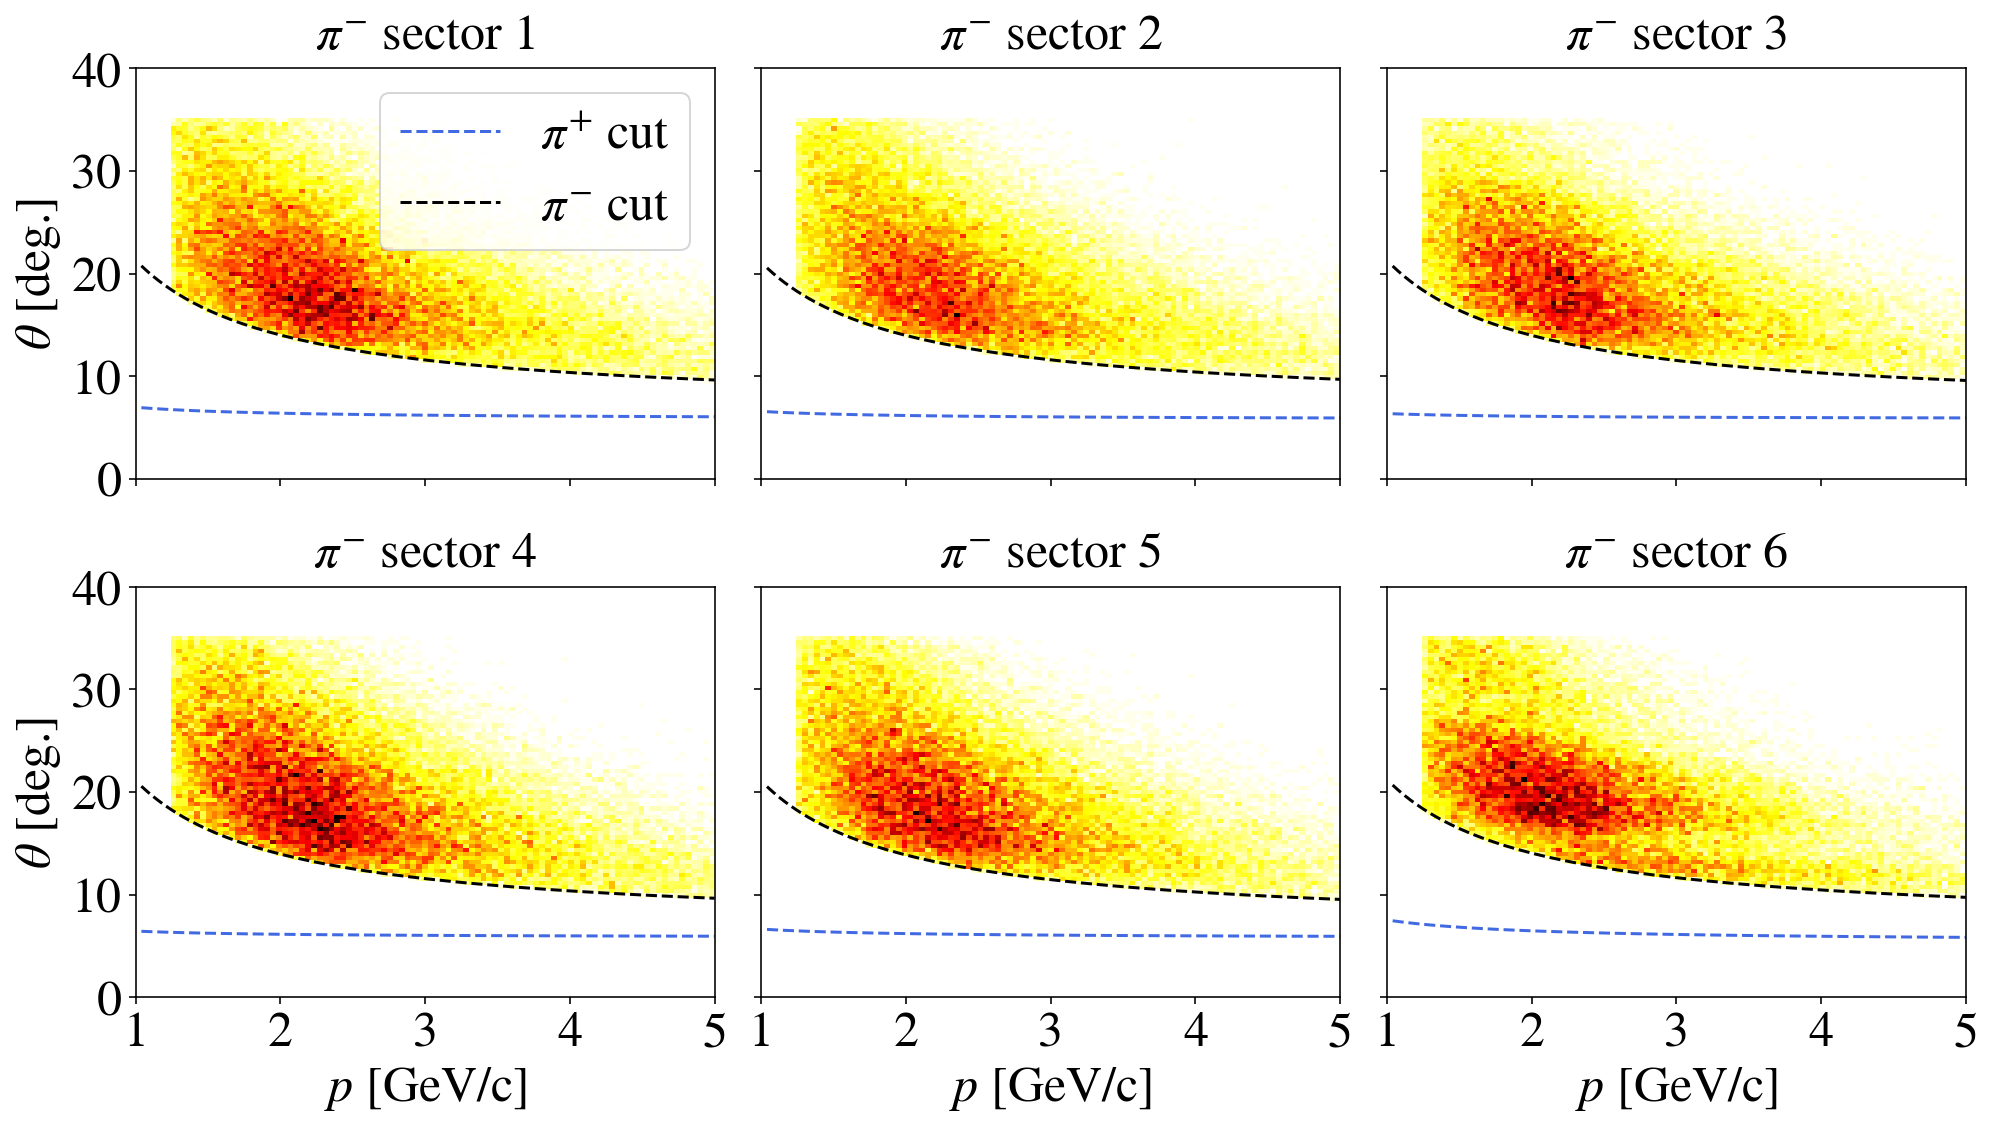

In [207]:
bins = (np.linspace(1,5,100),np.linspace(0,40,100))
xticks = np.linspace(1,5,5)
yticks = np.linspace(0,40,5)
for pi_charge_name,pi_label,pi_color in zip(pi_charge_names,pi_labels,pi_colors):#{
    df = e_e_pi_after_cut[pi_charge_name]



    fig = plt.figure(figsize=(14,8))
    for sector in range(1,7):
        ax = fig.add_subplot(2,3,sector)
        df_sector = df[df.pi_DC_sector == sector]

        plt.hist2d( df_sector.pi_P, df_sector.pi_Theta*r2d, cmap='hot_r',bins=bins, label='data');

        p = bins[0][1:]
        for pi_cut_charge_name,pi_cut_label,pi_cut_color in zip(pi_charge_names,pi_labels,pi_colors):
            min_theta = pi_min_theta_cut( pi_cut_charge_name, sector, p )
            plt.plot(p, min_theta, '--', label='$'+pi_cut_label+'$ cut', color=pi_cut_color)

        set_axes(ax,'$p$ [GeV/c]' if sector>3 else '',
                 '$\\theta$ [deg.]' if sector%3==1 else '',
                 remove_ticks_x = False if sector>3 else True,
                 remove_ticks_y = False if sector%3==1 else True,
                 title='$'+pi_label+'$ sector %d'%sector,xticks=xticks, yticks=yticks, 
                 do_add_legend=True if sector==1 else False)
    plt.tight_layout()                   

#}

In [ ]:
plot_step_hist(x_arr=